# Knapsack Solver

This notebook illustrates the different algorithms that can be used to solve a knapsack problem. <br>

The knapsack can be solved in two broad approaches - <br>
1. Dynamic Programming, Branch and Bound Techniques for opitimal solution. 
2. Heuristics - Evolutionary algorithms or greedy approaches for suboptimal but scalable solutions. 

The sections below illustrates how we can solve the problem through 
1. Greedy (Value density) Approach 
2. Dynamic Programming with Recursion
3. Dynamic Programming without Recursion

The dynamic prgramming algorithm enables us to solve low to medium scale problem to optimality. However, as the scale of the problem increases, we will not able able to allocate sufficient space for the problem. Solving using dynamic programming with recursion allows us to solve it without the need for storing the data, however, that exponentially increaes the time for computation. In such cases, branch and bound algorithms could be employed.

### Checking input file

In [33]:
from collections import namedtuple
import numpy as np
import sys
Item = namedtuple("Item", ['index', 'value', 'weight'])

problem_size=int(input("""Please select the problem you's like to solve -
1. 19 items 
2. 30 items 
3. 200 items
4. 10000 items
[Enter 1/2/3/4] - """))

if problem_size ==1:
    dat = "ks_19_0"
elif problem_size==2:
    dat = "ks_30_0"
elif problem_size==3:
    dat = "ks_200_0"
elif problem_size==4:
    dat = "ks_10000_0"
else:
    dat = "ks_10000_0"
    print("Invalid Input, running default case - 30 items")
    
# file_location = ".\\data\\ks_30_0"
file_location = ".\\data\\" +dat

with open(file_location, 'r') as input_data_file:
    input_data = input_data_file.read()

lines = input_data.split('\n')

firstLine = lines[0].split()
item_count = int(firstLine[0])
capacity = int(firstLine[1])

global items
items = []
#     global k 
k=0

for i in range(1, item_count+1):
    line = lines[i]
    parts = line.split()
    items.append(Item(i-1, int(parts[0]), int(parts[1])))

print("\nNumber of items - ",item_count) 
print("Capacity of Knapsack - ", capacity)
for i in items:
    print("item #%d, value = %d, weight = %d" %(i[0]+1,i[1],i[2]))

Please select the problem you's like to solve -
1. 19 items 
2. 30 items 
3. 200 items
4. 10000 items
[Enter 1/2/3/4] - 3

Number of items -  200
Capacity of Knapsack -  100000
item #1, value = 90001, weight = 90000
item #2, value = 89751, weight = 89750
item #3, value = 10002, weight = 10001
item #4, value = 89501, weight = 89500
item #5, value = 10254, weight = 10252
item #6, value = 89251, weight = 89250
item #7, value = 10506, weight = 10503
item #8, value = 89001, weight = 89000
item #9, value = 10758, weight = 10754
item #10, value = 88751, weight = 88750
item #11, value = 11010, weight = 11005
item #12, value = 88501, weight = 88500
item #13, value = 11262, weight = 11256
item #14, value = 88251, weight = 88250
item #15, value = 11514, weight = 11507
item #16, value = 88001, weight = 88000
item #17, value = 11766, weight = 11758
item #18, value = 87751, weight = 87750
item #19, value = 12018, weight = 12009
item #20, value = 87501, weight = 87500
item #21, value = 12270, weight 

### Master Code

In [37]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

from collections import namedtuple
import numpy as np
import sys
Item = namedtuple("Item", ['index', 'value', 'weight'])

def Sort(items):
    #A function to sort a lists of lists based on value in sublist
    items.sort(key = lambda x: x[1],reverse=True)
    return items

def dynamic_programming(capacity,item_count,items):
    
    dp_table = np.zeros((capacity+1,item_count+1))
#     dp_table=[[0 for x in range(capacity+1)] for y in range(item_count+1)]

    for item in range(item_count+1):
        for cap in range(capacity+1):
            if item ==0:
                dp_table[cap,item]=0
            elif items[item-1].weight <=cap:
                dp_table[cap,item]=max(dp_table[cap,item-1],items[item-1].value+dp_table[cap-items[item-1].weight,item-1])
            else:
                dp_table[cap,item]=dp_table[cap,item-1]

    optimal_value=int(dp_table[capacity,item_count])
    rem_cap=capacity 
#     print (dp_table)
    print("Size of the DP table - ", sys.getsizeof(dp_table)/1000000, "MB")

    taken = [0]*len(items)
    for col in range(item_count,0,-1):
        if dp_table[rem_cap,col]!=dp_table[rem_cap,col-1]:
    #         print ("item %d is selected" %(col))
            taken[col-1]=1
            rem_cap-=items[col-1].weight
            if rem_cap <=0:break
    
    # prepare the solution in the specified output format
    output_data = str(optimal_value) + ' ' + str(1) + '\n'
    output_data += ' '.join(map(str, taken))
    
    print("\nOptimal Value - ",optimal_value,"\n")
    return output_data

def greedy_value_density(capacity,item_count,items):
    item_density= []
    for i in range(0, item_count):
#         line = lines[i]
#         parts = line.split()
        item_density.append([i, items[i].value,items[i].weight,items[i].value/items[i].weight])


    Sort(item_density)
    
#     print(item_density)

    # a trivial algorithm for filling the knapsack
    # it takes items in-order until the knapsack is full
    value = 0
    weight = 0
    taken = [0]*len(items)
    
    for item in item_density:
        if weight + item[2] <= capacity:
            taken[item[0]] = 1
            value += item[1]
            weight += item[2]
        
    
    # prepare the solution in the specified output format
    output_data = str(value) + ' ' + str(0) + '\n'
    output_data += ' '.join(map(str, taken))
    return output_data


    
def solve_it(input_data):
    # Modify this code to run your optimization algorithm

    # parse the input
    lines = input_data.split('\n')

    firstLine = lines[0].split()
    item_count = int(firstLine[0])
    capacity = int(firstLine[1])

    items = []

    for i in range(1, item_count+1):
        line = lines[i]
        parts = line.split()
        items.append(Item(i-1, int(parts[0]), int(parts[1])))
    
    #Calling relavant algorithm based on input

    if item_count <=200:
        return dynamic_programming(capacity,item_count,items)
    else :
        return greedy_value_density(capacity,item_count,items)

if __name__ == '__main__':

    import sys
    if len(sys.argv) > 1:
        problem_size=int(input("""Please select the problem you's like to solve -
1. 19 items 
2. 30 items 
3. 200 items [May take 20 seconds- Notice the memory required to solve the problem in the output]
4. 10000 items
[Enter 1/2/3/4] - """))

        if problem_size ==1:
            dat = "ks_19_0"
        elif problem_size==2:
            dat = "ks_30_0"
        elif problem_size==3:
            dat = "ks_200_0"
        elif problem_size==4:
            print("\nThe value density greedy heuristic is used to solve the problem!\n")
            dat = "ks_10000_0"
        else:
            dat = "ks_10000_0"
            print("Invalid Input, running default case - 30 items")

        # file_location = ".\\data\\ks_30_0"
        file_location = ".\\data\\" +dat
#         file_location = ".\\data\\ks_200_0"
        
        with open(file_location, 'r') as input_data_file:
            input_data = input_data_file.read()
        print(solve_it(input_data))
    else:
        print('This test requires an input file.  Please select one from the data directory. (i.e. python solver.py ./data/ks_4_0)')



Please select the problem you's like to solve -
1. 19 items 
2. 30 items 
3. 200 items [May take 20 seconds- Notice the memory required to solve the problem in the output]
4. 10000 items
[Enter 1/2/3/4] - 2
Size of the DP table -  24.800376 MB

Optimal Value -  99798 

99798 1
0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0


### Greedy - Value Density 

In [65]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

from collections import namedtuple
Item = namedtuple("Item", ['index', 'value', 'weight'])

def Sort(items):

    items.sort(key = lambda x: x[1],reverse=True)
    return items

def solve_it(input_data):
    # Modify this code to run your optimization algorithm

    # parse the input
    lines = input_data.split('\n')

    firstLine = lines[0].split()
    item_count = int(firstLine[0])
    capacity = int(firstLine[1])

    items = []

    for i in range(1, item_count+1):
        line = lines[i]
        parts = line.split()
        items.append(Item(i-1, int(parts[0]), int(parts[1])))
    
    
    #Creating a list with items value density
    item_density= []
    for i in range(1, item_count+1):
        line = lines[i]
        parts = line.split()
        item_density.append([i-1, int(parts[0]),int(parts[1]),int(parts[0])/int(parts[1])])


    Sort(item_density)
    
#     print(item_density)

    # a trivial algorithm for filling the knapsack
    # it takes items in-order until the knapsack is full
    value = 0
    weight = 0
    taken = [0]*len(items)
    
    for item in item_density:
        if weight + item[2] <= capacity:
            taken[item[0]] = 1
            value += item[1]
            weight += item[2]
        

#     for item in items:
#         if weight + item.weight <= capacity:
#             taken[item.index] = 1
#             value += item.value
#             weight += item.weight
    
    # prepare the solution in the specified output format
    output_data = str(value) + ' ' + str(0) + '\n'
    output_data += ' '.join(map(str, taken))
    return output_data


if __name__ == '__main__':

    import sys
    if len(sys.argv) > 1:
#         file_location = sys.argv[1].strip()
        file_location = ".\\data\\ks_200_0"
        
        with open(file_location, 'r') as input_data_file:
            input_data = input_data_file.read()
        print(solve_it(input_data))
    else:
        print('This test requires an input file.  Please select one from the data directory. (i.e. python solver.py ./data/ks_4_0)')



90001 0
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


## Dynamic Programming

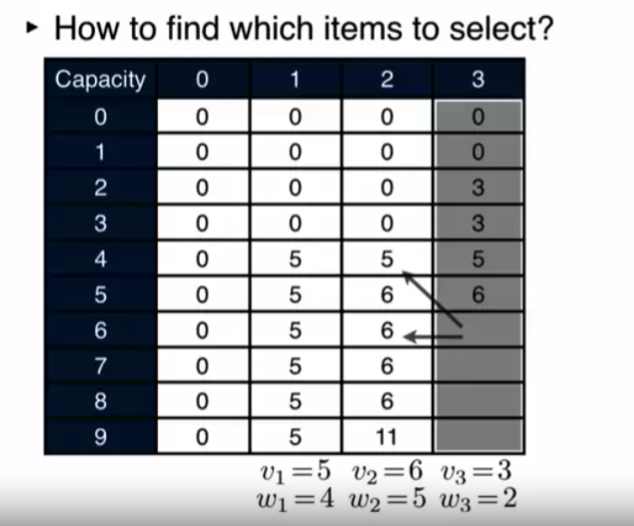

In [12]:
import numpy as np
import time

st = time.time()


def optimal(capacity, item_count):
    global k
    k+=1
    if item_count == 0:
        return 0
    elif items[item_count-1].weight <=capacity:
        return max(optimal(capacity,item_count-1),items[item_count-1].value+optimal(capacity-items[item_count-1].weight,item_count-1))
    else:
        return optimal(capacity,item_count-1)
    
print("Number of items - ",item_count) 
print("Capacity of Knapsack - ", capacity)

    
dp_table = np.zeros((capacity+1,item_count+1)) #instantiating a dynamic programming table as a np array object with relvant size


for item in range(item_count+1):
    for cap in range(capacity+1): 
        dp_table[cap,item]=optimal(cap,item)
#     print("item %d completed! Time Taken - %d" %(item,time.time()-st))

for i in items:
    print("item #%d, value = %d, weight = %d" %(i[0]+1,i[1],i[2]))
print(dp_table)

et = time.time()
elapsed_time = (et - st)*1000
print('Execution time:', elapsed_time, 'milliseconds')
print('Number of Function Calls - ',k)

Number of items -  4
Capacity of Knapsack -  11
item #1, value = 8, weight = 4
item #2, value = 10, weight = 5
item #3, value = 15, weight = 8
item #4, value = 4, weight = 3
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  4.]
 [ 0.  8.  8.  8.  8.]
 [ 0.  8. 10. 10. 10.]
 [ 0.  8. 10. 10. 10.]
 [ 0.  8. 10. 10. 12.]
 [ 0.  8. 10. 15. 15.]
 [ 0.  8. 18. 18. 18.]
 [ 0.  8. 18. 18. 18.]
 [ 0.  8. 18. 18. 19.]]
Execution time: 1.0073184967041016 milliseconds
Number of Function Calls -  339


### Generating DP table without recursion

In [36]:
import time
import numpy as np

dp_table = np.zeros((capacity+1,item_count+1))

for item in range(item_count+1):
    for cap in range(capacity+1):
        if item ==0:
            dp_table[cap,item]=0
        elif items[item-1].weight <=cap:
            dp_table[cap,item]=max(dp_table[cap,item-1],items[item-1].value+dp_table[cap-items[item-1].weight,item-1])
        else:
            dp_table[cap,item]=dp_table[cap,item-1]

optimal_value=dp_table[capacity,item_count]
rem_cap=capacity 
print (dp_table)

taken = [0]*len(items)
for col in range(item_count,0,-1):
    if dp_table[rem_cap,col]!=dp_table[rem_cap,col-1]:
#         print ("item %d is selected" %(col))
        taken[col-1]=1
        rem_cap-=items[col-1].weight
        if rem_cap <=0:break


print (taken)
print(optimal_value)

[[     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]
 ...
 [     0.  90001.  90001. ... 100236. 100236. 100236.]
 [     0.  90001.  90001. ... 100236. 100236. 100236.]
 [     0.  90001.  90001. ... 100236. 100236. 100236.]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
100236.0


### Depth First Search

In [ ]:
import numpy as np
import sys
from collections import deque
Item = namedtuple("Item", ['index', 'value', 'weight'])


def Sort(items):
    #A function to sort a lists of lists based on value in sublist
    items.sort(key = lambda x: x[3],reverse=True)
    return items

def objective_value(taken,items):
    
    objective=0
    for i in range(len(items)):
        objective+=(items[i].value)*int(taken[i])
        
    return objective

def best_estimate(item_density,capacity):
    best_estimate=0
    rem_cap=capacity
    for item in item_density:
        if item[2] <=rem_cap: #item[2]=weight of item
            rem_cap-=item[2]
            best_estimate+=item[1] #item[1]=value
        else:
            best_estimate+=rem_cap*item[3] #item[3]=value_density
            rem_cap=0
            break
    return best_estimate

def depth_branch_bound(capacity,item_count,items):
    
    #Creating list with value density
    item_density= []
    for i in range(0, item_count):
        item_density.append([i, items[i].value,items[i].weight,items[i].value/items[i].weight])        
    Sort(item_density) # Sorting items based on value density
    
    taken=[0] * item_count
    starting_index=0
    starting_value=0
    current_best_objective=0
    current_best_taken=taken
    prune=0
    depth=0

    #Vertex_Summary =[index,value,capacity,best_estimate_given_decisions,taken]
    vertex_summary=(starting_index,starting_value,capacity,best_estimate(item_density,capacity),taken)
    stack=deque()
    stack.append(vertex_summary)

    start = time.time()
    while len(stack)>0:

        index,value,room,best_est,taken=stack.pop()
        
        #Pruning if optimisitic estimate is less than the best solution we have already
        if best_est<current_best_objective:
            prune+=1
            continue
        
        #end of branch
        if (index >= item_count):
            depth+=1
            continue
            
        #Avoiding the item
        new_best_estimate_ifnot_taken= value+best_estimate(copy.deepcopy(item_density[index+1:]),capacity)
        # stack.appendleft((index+1,value,room,new_best_estimate_ifnot_taken,copy.deepcopy(taken)))
        stack.append((index+1,value,room,new_best_estimate_ifnot_taken,copy.deepcopy(taken)))
        
        #Taking the item if there is room for it.
        cur_item_value=item_density[index][1]
        cur_item_weight=item_density[index][2]
        new_best_estimate_if_taken=best_est #will remain same
        
        if cur_item_weight<=room:
            taken[item_density[index][0]]=1
            room=room-cur_item_weight
            # stack.appendleft((index+1,value+cur_item_value,room,new_best_estimate_if_taken,copy.deepcopy(taken)))
            stack.append((index+1,value+cur_item_value,room,new_best_estimate_if_taken,copy.deepcopy(taken)))
            current_best_objective = max(value+cur_item_value, current_best_objective)
            if ((value+cur_item_value) == current_best_objective):
                current_best_taken = copy.deepcopy(taken)
        
    

    print ("Branches Pruned - ",prune)
    print ("Depth's reached - ",depth)
    print("BnB (depth-first) Solution found in: " + str(time.time() - start) + " seconds")
    return current_best_taken,current_best_objective
    

    
    
    
##MAIN_CODE    
file_location = ".\\data\\ks_100_0"

with open(file_location, 'r') as input_data_file:
    input_data = input_data_file.read()
    
    #Parsing Input Data
    lines = input_data.split('\n')

    firstLine = lines[0].split()
    item_count = int(firstLine[0])
    capacity = int(firstLine[1])

    items = []

    for i in range(1, item_count+1):
        line = lines[i]
        parts = line.split()
        items.append(Item(i-1, int(parts[0]), int(parts[1])))
    
    #Calling Relevant Algorithm
    print(depth_branch_bound(capacity,item_count,items))


# initial_solution = np.zeros(())